<a href="https://colab.research.google.com/github/satriaamien/4/blob/master/Corona_random_walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ALGORITMA**

1 Inisialisasi variabel scalar
- jumlah individu
- rasio individu yang terinfeksi
- waktu pemulihan
- ukuran ruang simulasi
- probabilitas individu bergerak

2 Inisialisasi variabel list
- posisi masing-masing individu
- status kesehatan individu (individu dengan rasio tertentu berstatus terinfeksi)
- status imunitas individu
- waktu terinfeksi individu

3 Iterasi

Selama jumlah individu terinfeksi > 0:
- Untuk setiap individu:
- Update posisi berdasarkan probabilitas individu bergerak
- Koreksi posisi dengan PBC
- Update waktu terinfeksi untuk individu yang sudah terinfeksi.
- Update status kesehatan individu - recovery
- Jika waktu terinfeksi > waktu pemulihan, maka individu yang
terinfeksi didefinisikan pulih
- Update status imun individu (individu yang sudah pulih memiliki imun
sehingga tidak akan terinfeksi lagi)
- Update status kesehatan individu – infection
- Hitung jarak individu sehat dengan individu terinfeksi
- Jika jarak individu sehat sama dengan individu terinfeksi dan
individu tersebut belum memiliki imun, maka individu sehat
tersebut terinfeksi
- Hitung dan simpan jumlah individu terinfeksi

Instruksi Tugas
Buatlah simulasi penyebaran penyakit/virus dengan menggunakan Random Walk 4 
Arah dengan menggunakan variabel-variabel berikut:

o Jumlah individu: 200

o Rasio individu terinfeksi: 5%

o Probabilitas individu bergerak: 80%

o Waktu pemulihan: 10 hari

o Ukuran ruang simulasi: 20 x 20 unit

1. Challenge 1 (80 poin)
a. Lakukan simulasi dan buatlah plot jumlah individu yang terinfeksi tiap harinya.
b. Tentukan waktu pemulihan yang diperlukan oleh komunitas tersebut.
2. Challenge 2 (20 poin)
Buatlah video dari simulasi tersebut dan berikan pembeda (misal: warna) untuk 
individu yang sehat dan individu yang terinfeksi.

<function matplotlib.pyplot.show>

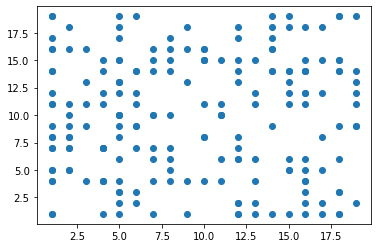

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(50)

data = np.random.randint(1,20,size=(200,2))
df = pd.DataFrame(data, columns=['x','y'])

# print(df)

plt.scatter(df['x'],df['y'])
plt.show 

In [0]:
#generate population 
all_df=df

In [0]:
# # df['x'].iloc[]
# z=df.append({"x":100},ignore_index=True)
# z
# z=df.drop(df.index[0])
# z[]

In [70]:
# generate infected people

infected = df.iloc[:10]
infected

,x,y
0,17,1
1,12,14
2,2,5
3,7,6
4,7,14
5,6,3
6,8,16
7,5,15
8,4,7
9,12,18


In [71]:
df = df.drop(df.index[:10])
df

,x,y
10,11,10
11,1,7
12,3,16
13,10,4
14,3,13
...,...,...
195,5,3
196,16,15
197,1,1
198,13,15


In [82]:
df

,x,y
0,17,1
1,12,14
2,2,5
3,7,6
4,7,14
...,...,...
195,5,3
196,16,15
197,1,1
198,13,15


In [144]:
# data = {'x': [], 
#         'y': [], 
#         } 
# tb_update=pd.DataFrame(data)
# # z=df.append({"x":100},ignore_index=True)
# tb_update=tb_update.append({"x":100},ignore_index=True)

# tb_update['x']


0    100.0
Name: x, dtype: float64

INFEKSI DAN YANG BELUM TERINFEKSI BISA BERGERAK

In [200]:
data = {'x': [], 
        'y': [], 
        } 
sehat_update=pd.DataFrame(data)
data2 = {'x': [], 
        'y': [],
         'status':[]
        } 
infected_update=pd.DataFrame(data2)
data3 = {'x': [], 
        'y': [], 
        } 
imun_update=pd.DataFrame(data3)

time_recovery=10
ITR = range(10)
POP = range(190)
np.random.seed(50)
df_drop=df
# time_infected=0
for i in ITR:#sehat
  # time+=1
  # print(time)
  # df=df_drop
  prob = np.random.random()
  if prob<=0.8:#TIDAK TERINFEKSI
    # tmp_x,tmp_y = [],[]
    for j in POP:
      min_x=min(all_df['x'])#buat rumus pcb
      min_y=min(all_df['y'])
      max_x=max(all_df['x'])
      max_y=max(all_df['y'])

      x = df['x'].iloc[j]
      y = df['y'].iloc[j]
      rand = np.random.random()
      if rand <= 0.25:
            x+=1
      elif (rand>0.25 and rand<=0.5):
            x-=1
      elif (rand>0.5 and rand<=0.75):
            y+=1
      else:
            y-=1
      if x>max_x:
        x=x-(max_x-min_x)
      if x<min_x:
        x=x+(max_x-min_x)
      if y>max_y:
        y=y-(max_y-min_y)
      if y<min_y:
        y=y+(max_y-min_y)
        # print(x)
        # print(y)
      sehat_update=sehat_update.append({'x':x,'y':y},ignore_index=True)

  # infected
    for a in range(len(infected)): #terinfeksi
      min_x=min(all_df['x'])
      min_y=min(all_df['y'])
      max_x=max(all_df['x'])
      max_y=max(all_df['y'])

      x2 = infected['x'].iloc[a]
      y2 = infected['y'].iloc[a]
      rand = np.random.random()
      if rand <= 0.25:
            x2+=1
      elif (rand>0.25 and rand<=0.5):
            x2-=1
      elif (rand>0.5 and rand<=0.75):
            y2+=1
      else:
            y2-=1
      if x2>max_x:
        x2=x2-(max_x-min_x)
      if x2<min_x:
        x2=x2+(max_x-min_x)
      if y2>max_y:
        y2=y2-(max_y-min_y)
      if y<min_y:
        y2=y2+(max_y-min_y)
      # print(x2)
      # print(y2) 
      infected_update=infected_update.append({'x':x2,'y':y2},ignore_index=True)

    #time infeksi
    infected_update['status']=infected_update['status'].fillna(0)
    infected_update['status']=infected_update['status']+1
    
    #FASE PENYEMBUHAN & imun jika lebih dari 10 statusnya 
    for d in range(len(infected_update)):
      if(infected_update['status'].iloc[d]>time_recovery):
        imun_update=imun_update.append({'x':infected_update['x'].iloc[d],'y':infected_update['y'].iloc[d]},ignore_index=True)
        
      # recovery_update = recovery_update.append()

    

    # #perinfeksian data apabila koordinat sama
    # jml_sehat=len(sehat_update)
    # jml_infected=len(infected)
    # temp=[]
    # j=0
    # print(jml_sehat)
    # for c in range(jml_infected):
    #   for b in range(len(sehat_update)):
    #     if(sehat_update['x'].iloc[b]==infected_update['x'].iloc[c]) and (sehat_update['y'].iloc[b]==infected_update['y'].iloc[c]):
    #       j+=1
    #       infected_update = infected_update.append({'x':x2,'y':y2},ignore_index=True)
    #       sehat_update = sehat_update.drop(sehat_update.index[b])
    #       break













    # for d in range(len(temp)):
    #   for e in range(len(sehat_update)): #hapus data sehat       
    #     if(sehat_update.index[d]==sehat_update.index[e]):
    #       sehat_update = sehat_update.drop(sehat_update.index[e])
    #       # jml_sehat=jml_sehat-1
    #     break
    #     print(len(sehat_update))
     
      
    # print(x)

    #UPDATE WAKTU TERINFEKSI
    # time_infected+=1

    #UPDATE STATUS PENYEMBUHAN 


  break
# print(sehat_update['x'].index[122])
# print(temp)
# infected_update['status'].iloc[:2]=1
# infected_update['status']=infected_update['status']+2
infected_update
#   break
# plt.scatter(sehat_update['x'],sehat_update['y'],c='g')
# plt.scatter(infected_update['x'],infected_update['y'],c='r')
# plt.show()

,x,y,status
0,18.0,1.0,1.0
1,13.0,14.0,1.0
2,3.0,5.0,1.0
3,7.0,5.0,1.0
4,8.0,14.0,1.0
5,5.0,3.0,1.0
6,9.0,16.0,1.0
7,4.0,15.0,1.0
8,4.0,6.0,1.0
9,12.0,17.0,1.0


In [0]:
df_drop

In [45]:
ITR = range(10)
POP = range(190)

for i in ITR:
  prob = np.random.random()
  if prob<=0.8:
    tmp_x,tmp_y = [],[]
    for j in POP:
      rand = np.random.random()
      x = df['x'].iloc[j]
      y = df['y'].iloc[j]
      rand = np.random.random()
      if rand <= 0.25:
            x+=1
      elif (rand>0.25 and rand<=0.5):
            x-=1
      elif (rand>0.5 and rand<=0.75):
            y+=1
      else:
            y-=1
      if x>20:
        x=x-20
      if x<20:
        x=x+20
      if y>20:
        y=y-20
      if y<20:
        y=y+20
      print(x)
      break
  break
      # for k in range(10):
      #   if(x==infected['x'].iloc[k] and y==infected['y'].iloc[k]):
      #     infected = infected.append({'x':x,'y':y},ignore_index=True)
      #     df = df.drop(df.index[i])

# infected

36
